In [50]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [51]:
# Loading data
file_path = Path("crypto_data.csv")
df = pd.read_csv(file_path,index_col=0)
df.head(5)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [52]:
# Keeping only cryptos that are actively trading and dropping the IsTrading column after
Cleaned_df = df.loc[df['IsTrading']==True]
Cleaned_df = Cleaned_df.drop(columns=['IsTrading'])
Cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [53]:
# Removing rows with nulls
Cleaned_df = Cleaned_df.dropna()

In [54]:
# Keep all the cryptocurrencies that have a working algorithm.
Cleaned_df = Cleaned_df[Cleaned_df.Algorithm.isna() == False]
print(Cleaned_df.shape)
Cleaned_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [55]:
# Filter for cryptocurrencies that have been mined
Cleaned_df = Cleaned_df.loc[Cleaned_df['TotalCoinsMined'] != 0]

In [56]:
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
Cleaned_df = Cleaned_df.drop(columns=['CoinName'])

In [57]:
Cleaned_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [58]:
Cleaned_df['TotalCoinSupply'] = Cleaned_df['TotalCoinSupply'].astype(float)

In [59]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables
X = pd.get_dummies(Cleaned_df, columns=["Algorithm", "ProofType"])

In [60]:
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled[0:5]

array([[-0.11674788, -0.15286468, -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.07523548, -0.0433555 , -0.06137164, -0.06137164,
        -0.0433555 , -0.0433555 , -0.19226279, -0.06137164, -0.09731237,
        -0.0433555 , -0.11536024, -0.07523548, -0.0433555 , -0.0433555 ,
        -0.15176505, -0.0433555 , -0.13105561, -0.0433555 , -0.0433555 ,
        -0.08695652, -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.06137164, -0.0433555 , -0.08695652, -0.08695652, -0.08695652,
        -0.0433555 , -0.13105561, -0.13827675, -0.13827675, -0.0433555 ,
        -0.06137164, -0.0433555 , -0.07523548, -0.1815096 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.07523548, -0.15811388, -0.3145935 ,
        -0.0433555 , -0.08695652, -0.07523548, -0.06137164, -0.0433555 ,
         1.38873015, -0.0433555 , -0.0433555 , -0.06137164, -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 , -0.0433555 ,
        -0.0433555 , -0.0433555 , -0.39836623, -0.0

In [65]:
# Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3. For this project, preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca
pca_df = pd.DataFrame(data=crypto_pca,columns=["PC_1","PC_2", "PC_3"],index=Cleaned_df.index)

In [66]:
pca_df.head()

,PC_1,PC_2,PC_3
42,-0.367061,0.963579,-0.595618
404,-0.350646,0.963300,-0.596081
1337,2.204712,1.432853,-0.735852
BTC,-0.119584,-1.289570,0.221686
ETH,-0.110805,-1.952874,0.375656


In [68]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
 # Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(pca_df)

In [69]:
# Prepare to plot the dataset

# The first column of transformed features
pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
pca_df['y'] = tsne_features[:,1]

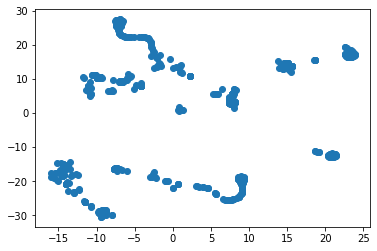

In [73]:
# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(pca_df['x'], pca_df['y'])
plt.show()

In [ ]:
# After running TSNE, there seems to be obvious distinct clusters in our visualization

In [79]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears
from sklearn.cluster import KMeans
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,249071.046419
1,2,95081.559710
2,3,61122.804394
3,4,36353.612927
4,5,27340.088903


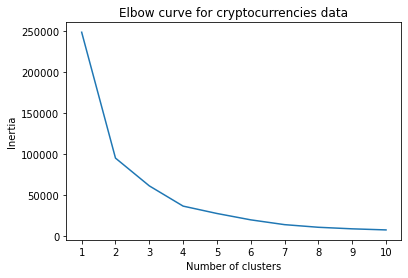

In [81]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrencies data')
plt.show()

In [ ]:
# Based on my visualization, I observe that the elbow of the plot is roughly around at 4 clusters, I would recommend my clients to only cluster up to 4